In [1]:
using PyPlot
using MAT
using DSP
include("barycenter.jl")

barycenter_unbalanced_1d_signal_linear_stable (generic function with 1 method)

In [2]:
function ricker_func1(t, t0, fre)
    return (1 .- 2*pi^2 .* fre^2 .* (t.-t0).^2) .* exp.(-pi^2 .* fre^2 .* (t.-t0).^2)
end

ricker_func1 (generic function with 1 method)

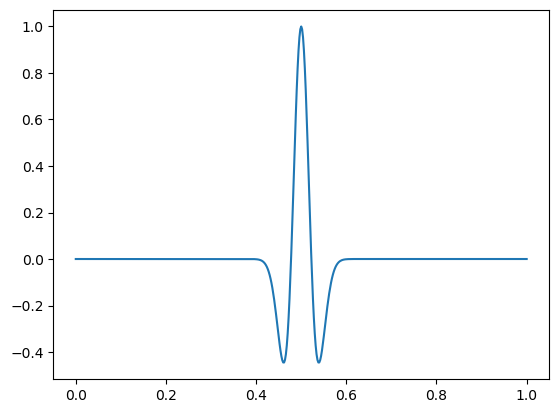

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1420fc510>

In [3]:
Fs = 500
dt = 1/Fs
Nt = 501
t = range(0,step=dt,length=Nt)
ricker = ricker_func1(t, 0.5, 10)
plot(t,ricker)

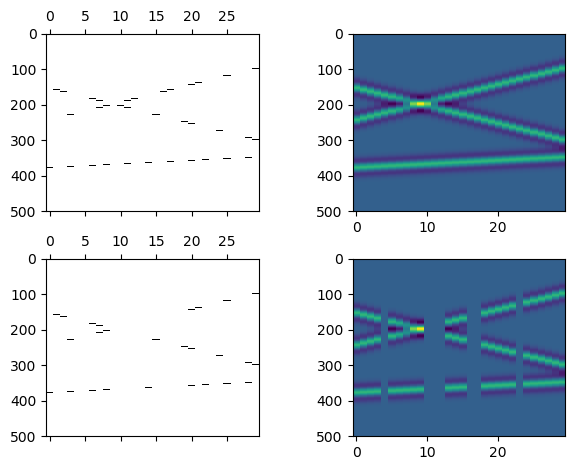

In [4]:
trace_len = 30
S_ref = zeros(Nt, trace_len)
for i = 1:trace_len
    ind1 = floor(Int,150+i*5)
    S_ref[ind1,i] += 1
    ind1 = floor(Int,250-i*5)
    S_ref[ind1,i] += 1
    ind1 = floor(Int,380-i*1)
    S_ref[ind1,i] += 1
end
S = 0 .* S_ref
for i = 1:trace_len
    ss = conv(S_ref[:,i], ricker)
    ss = ss[251:751]
    S[:,i] = ss
end

cut_trace = [5 11 12 13 17 18 24]
S_ref0 = copy(S_ref)
S0 = copy(S)
for i in cut_trace
    S_ref0[:,i] .= 0
    S0[:,i] .= 0
end

subplot(221)
spy(S_ref, aspect=0.05)
subplot(222)
imshow(S, aspect=0.05)
subplot(223)
spy(S_ref0, aspect=0.05)
subplot(224)
imshow(S0, aspect=0.05)
tight_layout()

In [5]:
M = cost_matrix_1d(t, t; p=2)
reg = 5e-5
reg_m = 1e5
itertime = 500
S1 = copy(S0)
# 5
P = zeros(Nt,2)
P[:,1] = S[:,4]; P[:,2] = S[:,6]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=0, iterMax=itertime, verbose=false)
S1[:,5] = pp

P = zeros(Nt,2)
P[:,1] = S[:,10]; P[:,2] = S[:,14]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=[3,1], iterMax=itertime, verbose=false)
S1[:,11] = pp

P = zeros(Nt,2)
P[:,1] = S[:,10]; P[:,2] = S[:,14]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=[1,1], iterMax=itertime, verbose=false)
S1[:,12] = pp

P = zeros(Nt,2)
P[:,1] = S[:,10]; P[:,2] = S[:,14]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=[1,3], iterMax=itertime, verbose=false)
S1[:,13] = pp

P = zeros(Nt,2)
P[:,1] = S[:,16]; P[:,2] = S[:,19]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=[2,1], iterMax=itertime, verbose=false)
S1[:,17] = pp

P = zeros(Nt,2)
P[:,1] = S[:,16]; P[:,2] = S[:,19]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=[1,2], iterMax=itertime, verbose=false)
S1[:,18] = pp

P = zeros(Nt,2)
P[:,1] = S[:,23]; P[:,2] = S[:,25]
pp = barycenter_unbalanced_1d_signal_stable(P, M, reg, reg_m; lambda=0, iterMax=itertime, verbose=false)
S1[:,24] = pp;

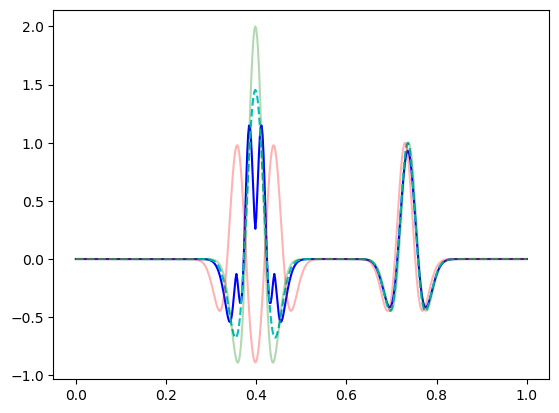

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1444e9e10>
 PyObject <matplotlib.lines.Line2D object at 0x1444e9fd0>

In [17]:
id = 11
plot(t,S1[:,id],"b",t,S[:,id],"c--")
plot(t,S[:,10], "g",t ,S[:,14], "r",alpha=0.3)

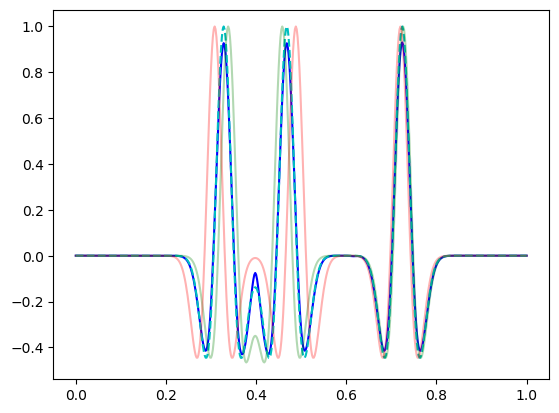

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1445b1a90>
 PyObject <matplotlib.lines.Line2D object at 0x1445a3190>

In [18]:
id = 17
plot(t,S1[:,id], "b" ,t,S[:,id], "c--")
plot(t,S[:,16], "g",t ,S[:,19], "r",alpha=0.3)

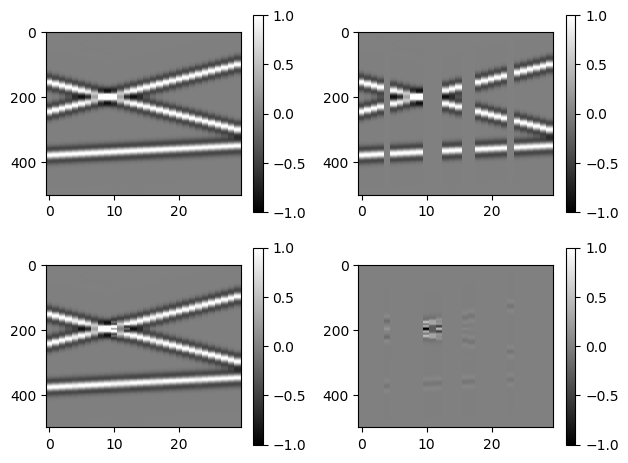

In [19]:
subplot(221)
imshow(S, aspect=0.05, cmap="gray"); colorbar(); clim([-1,1])
subplot(222)
imshow(S0, aspect=0.05, cmap="gray"); colorbar(); clim([-1,1])
subplot(223)
imshow(S1, aspect=0.05, cmap="gray"); colorbar(); clim([-1,1])
subplot(224)
imshow(S1-S, aspect=0.05, cmap="gray"); colorbar(); clim([-1,1])
tight_layout()